# Exploratory Data Analysis

1. Exploring the dataset
2. Checking for imbalanced data (in Classification)
3. Missing Values
4. Numerical Discrete Features
5. Numerical Continuous Features
6. Categorical Features and cardinality
7. Outliers
8. Other Plots

### Import Libraries
Let's import some libraries to get started!

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Step 1 : Explore the data

Let's start by reading in the titanic_train.csv file into a pandas dataframe and explore some basic information about the data.

In [4]:
df = pd.read_csv('data.csv')
df.head()

,RowID,Loan_Amount,Term,Interest_Rate,Employment_Years,Home_Ownership,Annual_Income,Verification_Status,Loan_Purpose,State,Debt_to_Income,Delinquent_2yr,Revolving_Cr_Util,Total_Accounts,Bad_Loan,Longest_Credit_Length
0,1,5000.0,36 months,10.65,10.0,RENT,24000.0,VERIFIED - income,credit_card,AZ,27.65,0.0,83.7,9.0,GOOD,26.0
1,2,2500.0,60 months,15.27,0.5,RENT,30000.0,VERIFIED - income source,car,GA,1.00,0.0,9.4,4.0,BAD,12.0
2,3,2400.0,36 months,15.96,10.0,RENT,12252.0,not verified,small_business,IL,8.72,0.0,98.5,10.0,GOOD,10.0
3,4,10000.0,36 months,13.49,10.0,RENT,49200.0,VERIFIED - income source,other,CA,20.00,0.0,21.0,37.0,GOOD,15.0
4,5,5000.0,36 months,7.90,3.0,RENT,36000.0,VERIFIED - income source,wedding,AZ,11.20,0.0,28.3,12.0,GOOD,7.0


In [5]:
# show nr of rows and columns
df.shape

(163994, 16)

In [6]:
# show the columns, its datatype and the number of non Nan values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163994 entries, 0 to 163993
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   RowID                  163994 non-null  int64  
 1   Loan_Amount            163987 non-null  float64
 2   Term                   163987 non-null  object 
 3   Interest_Rate          163987 non-null  float64
 4   Employment_Years       158183 non-null  float64
 5   Home_Ownership         163987 non-null  object 
 6   Annual_Income          163983 non-null  float64
 7   Verification_Status    163987 non-null  object 
 8   Loan_Purpose           163987 non-null  object 
 9   State                  163987 non-null  object 
 10  Debt_to_Income         163987 non-null  float64
 11  Delinquent_2yr         163958 non-null  float64
 12  Revolving_Cr_Util      163794 non-null  float64
 13  Total_Accounts         163958 non-null  float64
 14  Bad_Loan               163994 non-nu

In [7]:
df.describe()

,RowID,Loan_Amount,Interest_Rate,Employment_Years,Annual_Income,Debt_to_Income,Delinquent_2yr,Revolving_Cr_Util,Total_Accounts,Longest_Credit_Length
count,163994.00000,163987.000000,163987.000000,158183.000000,1.639830e+05,163987.000000,163958.000000,163794.000000,163958.000000,163958.000000
mean,81997.50000,13074.169141,13.715904,5.729389,7.191567e+04,15.881530,0.227357,54.079173,24.579734,14.854274
std,47341.13436,7993.556189,4.391940,3.541945,5.907092e+04,7.587668,0.694168,25.285367,11.685190,6.947733
min,1.00000,500.000000,5.420000,0.500000,1.896000e+03,0.000000,0.000000,0.000000,1.000000,0.000000
25%,40999.25000,7000.000000,10.650000,2.000000,4.500000e+04,10.230000,0.000000,35.600000,16.000000,10.000000
50%,81997.50000,11325.000000,13.490000,6.000000,6.100000e+04,15.620000,0.000000,55.800000,23.000000,14.000000
75%,122995.75000,18000.000000,16.320000,10.000000,8.500000e+04,21.260000,0.000000,74.200000,31.000000,18.000000
max,163994.00000,35000.000000,26.060000,10.000000,7.141778e+06,39.990000,29.000000,150.700000,118.000000,65.000000




## Step 2: Check for imbalanced data


<AxesSubplot:xlabel='Bad_Loan', ylabel='count'>

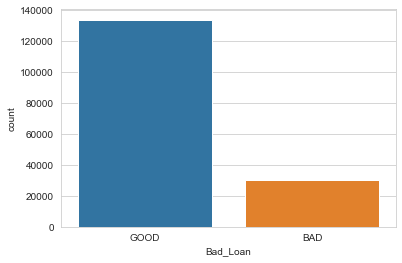

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='Bad_Loan',data=df)

* We can see that the dataset is imbalanced.

In [9]:
# show the amount of records in minority and majority class
df['Bad_Loan'].value_counts()

GOOD    133978
BAD      30016
Name: Bad_Loan, dtype: int64

In [11]:
# show the percentage of records of minority and majority class
df['Bad_Loan'].value_counts() / len(df) * 100

GOOD    81.696891
BAD     18.303109
Name: Bad_Loan, dtype: float64

### Step 3 : Missing Values

This function return True if there is any missing values in data, otherwise returns False. It also creates a csv file with the amount and percentage of missing values for each feature

In [15]:
def check_for_missing_values(dataset):
    
    if dataset.isna().sum().any():

        df_nan_values = pd.DataFrame()

        for col in dataset.columns:
            nr_nan_values_percentage = dataset[col].isna().mean() * 100
            nr_nan_values = dataset[col].isna().sum()

            if nr_nan_values > 0:
                row = {'Feature' : col, 
                       'Percentage Nan Values' : nr_nan_values_percentage, 
                       'Amount Nan Values' : nr_nan_values}
                df_nan_values = df_nan_values.append(row, ignore_index=True)


        df_nan_values.to_csv('missing_values_info.csv', index=False)
        
        return True
    
    else:
        return False

In [16]:
if check_for_missing_values(df):
    print('There are missing values')
else:
    print('There are no missing values')

There are missing values


In [17]:
# show information about missing values in each column
pd.read_csv('missing_values_info.csv')

,Amount Nan Values,Feature,Percentage Nan Values
0,7.0,Loan_Amount,0.004268
1,7.0,Term,0.004268
2,7.0,Interest_Rate,0.004268
3,5811.0,Employment_Years,3.543422
4,7.0,Home_Ownership,0.004268
5,11.0,Annual_Income,0.006708
6,7.0,Verification_Status,0.004268
7,7.0,Loan_Purpose,0.004268
8,7.0,State,0.004268
9,7.0,Debt_to_Income,0.004268


We can use seaborn to create a simple heatmap to see where we are missing data!

<AxesSubplot:>

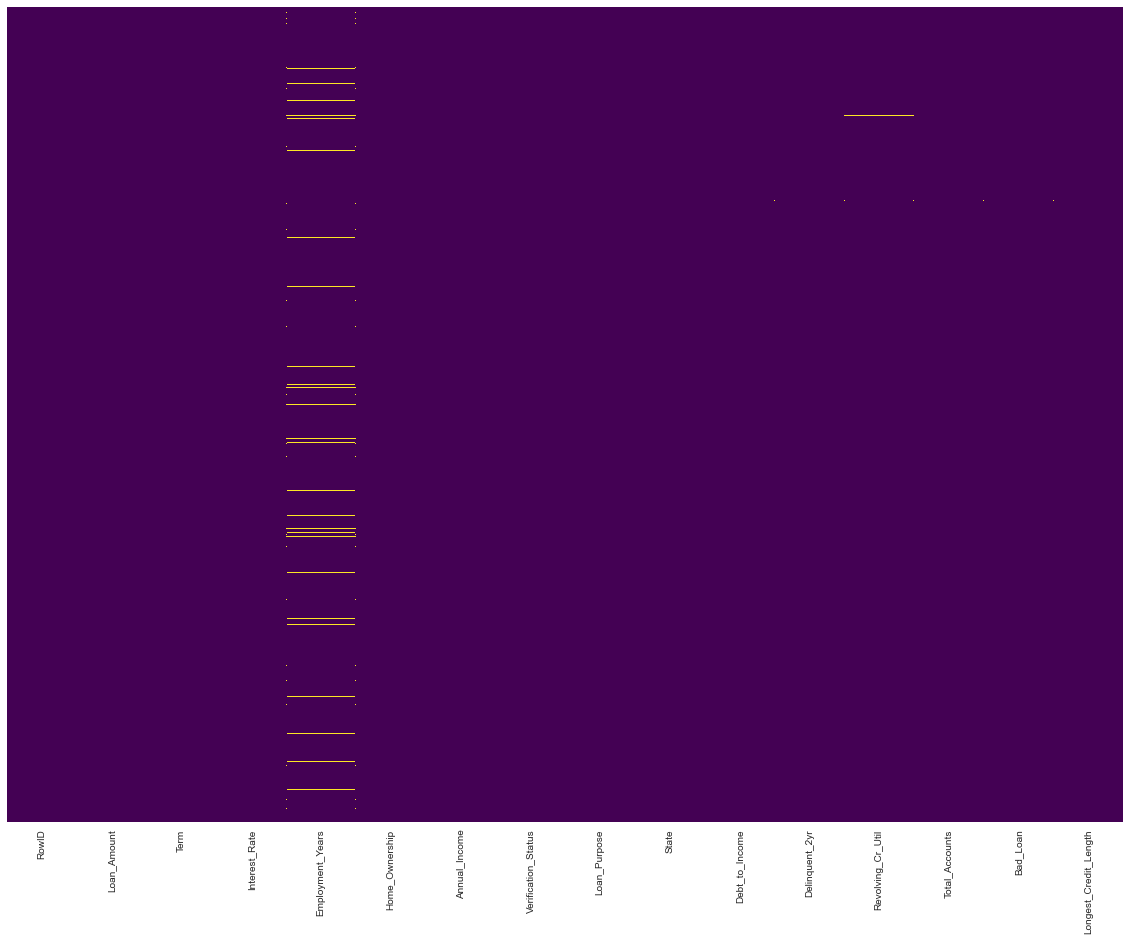

In [21]:
plt.figure(figsize=(20,15))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

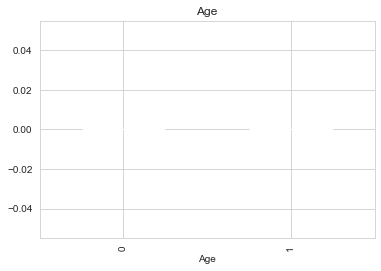

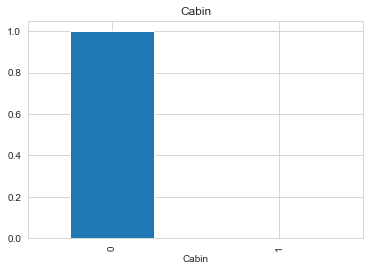

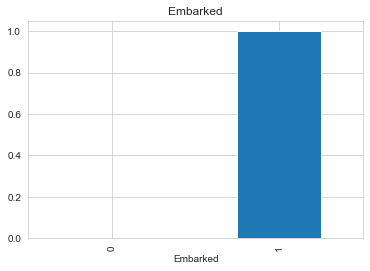

In [41]:
# features_with_na=[features for features in df.columns if df[features].isnull().sum()>0]

# for feature in features_with_na:
#     data = df.copy()
    
#     # let's make a variable that indicates 1 if the observation was missing or zero otherwise
#     data[feature] = np.where(data[feature].isnull(), 1, 0)
    
#     # let's calculate the mean SalePrice where the information is missing or present
#     data.groupby(feature)['Survived'].median().plot.bar()
#     plt.title(feature)
#     plt.show()

### Step 4 : Numerical Discrete Features

In [23]:
# Numerical Features
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O' and feature not in ['RowID']]

print('Number of numerical variables: ', len(numerical_features))
print(numerical_features)

Number of numerical variables:  9
['Loan_Amount', 'Interest_Rate', 'Employment_Years', 'Annual_Income', 'Debt_to_Income', 'Delinquent_2yr', 'Revolving_Cr_Util', 'Total_Accounts', 'Longest_Credit_Length']


In [25]:
# Numerical Discrete Features
# I will denote a dicrete feature if it has less than 25 different numerical values

discrete_features=[feature for feature in numerical_features if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_features)))
print(discrete_features)

Discrete Variables Count: 2
['Employment_Years', 'Delinquent_2yr']


Show the distribution of discrete features using Count Plot


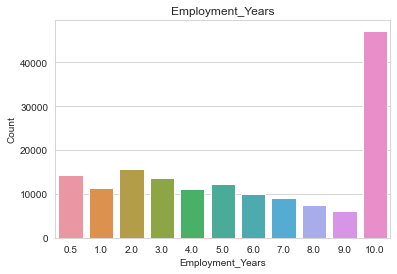

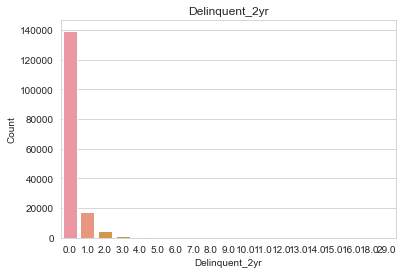

In [26]:
sns.set_style('whitegrid')

for feature in discrete_features:
    data=df.copy()
    
    sns.countplot(x=feature, data=data)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

Show relationship between dicrete feature and target feature.

For each category of discrete feature show the mean of Survived. Higher the mean, higher the chance that if a passenger belongs to this category, has survived

In [31]:
# We should calculate the mean of feature Bad_Loan. So we must first convert it into numerical

df['Bad_Loan'] = df['Bad_Loan'].map({'BAD' : 1, 'GOOD' : 0})

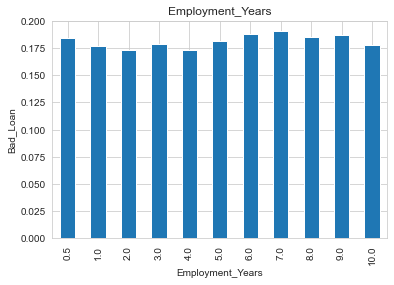

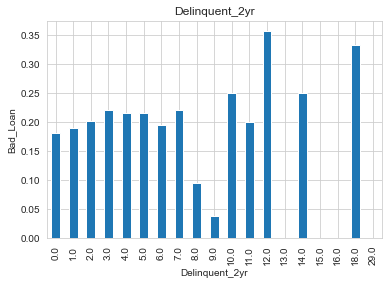

In [32]:
for feature in discrete_features:
    data=df.copy()
    data.groupby(feature)['Bad_Loan'].mean().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Bad_Loan')
    plt.title(feature)
    plt.show()

For each category of a discrete features show the count of 0s and 1s (count of passengers who survived and didnt survive). For a particular category, if the count of 1s (passengers who survived) is higher than the count of 0s (passenger who didnt survive), there is more likely that the passenger will survive if he belongs to this category.

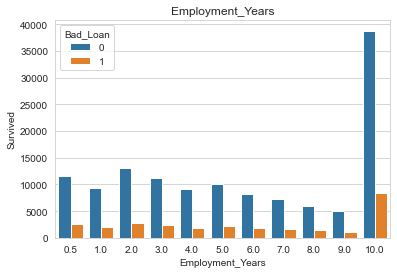

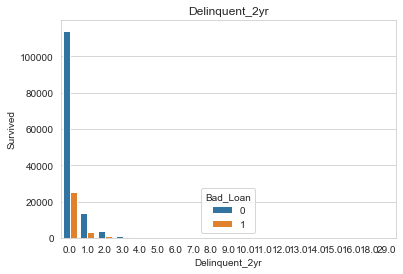

In [33]:
sns.set_style('whitegrid')

for feature in discrete_features:
    data=df.copy()
    
    sns.countplot(x=feature,hue='Bad_Loan' ,data=data)
    plt.xlabel(feature)
    plt.ylabel('Bad_Loan')
    plt.title(feature)
    plt.show()

### Step 5 : Numerical Continuous Features

In [35]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_features]
print("Continuous feature Count {}".format(len(continuous_feature)))
print(continuous_feature)

Continuous feature Count 7
['Loan_Amount', 'Interest_Rate', 'Annual_Income', 'Debt_to_Income', 'Revolving_Cr_Util', 'Total_Accounts', 'Longest_Credit_Length']


Show the distribution of continous features using Histogram or DistPlot.

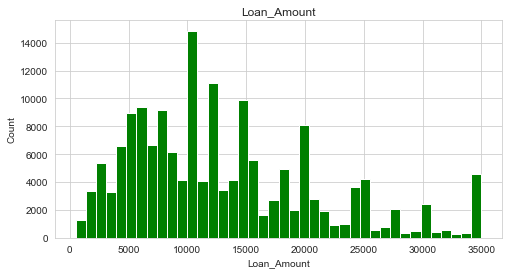

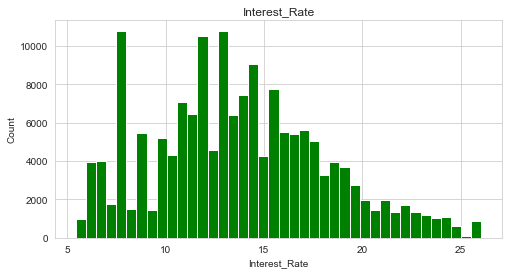

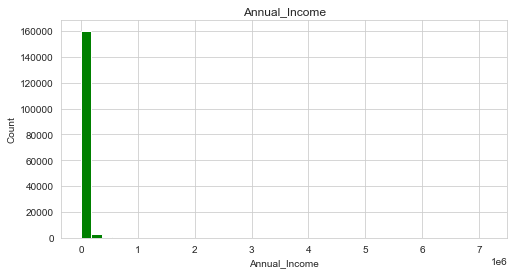

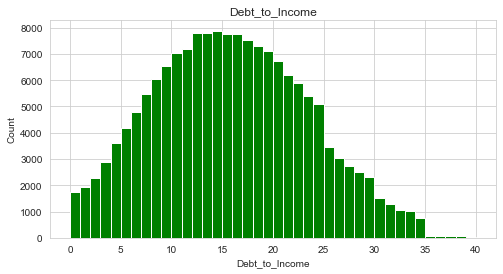

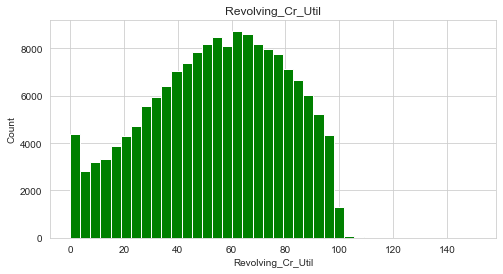

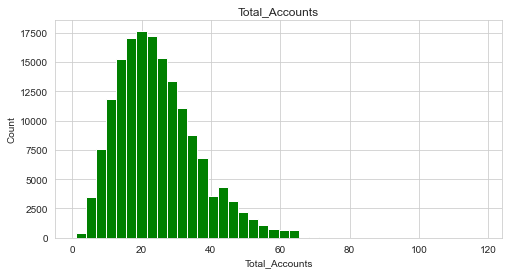

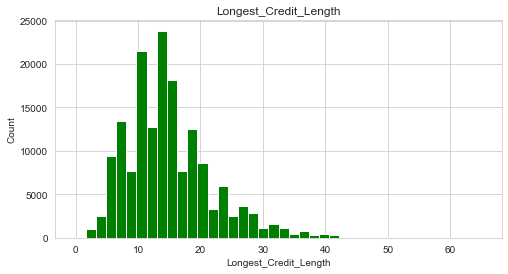

In [36]:
for feature in continuous_feature:
    data=df.copy()
    data[feature].hist(color='green',bins=40,figsize=(8,4)) 
    #sns.distplot(df[feature], kde=True,color='darkred',bins=40) # df[feature].dropna() to drop nan values
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

 Show relationship between continous feature and target feature.

Group by Bad_Loan and show the boxplot of the continous feature.

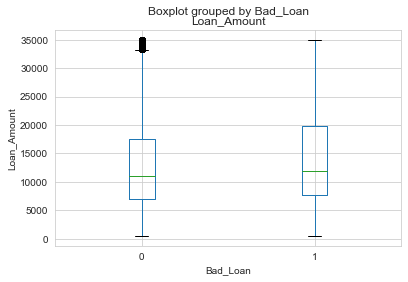

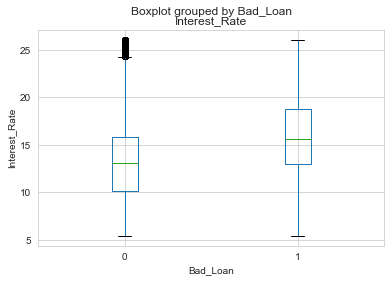

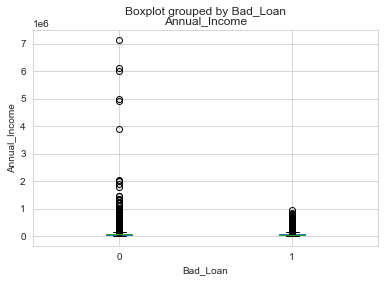

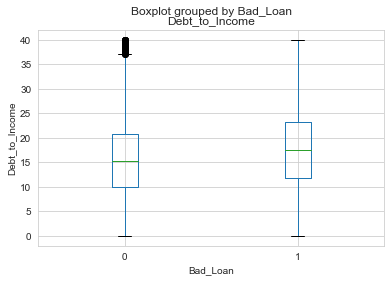

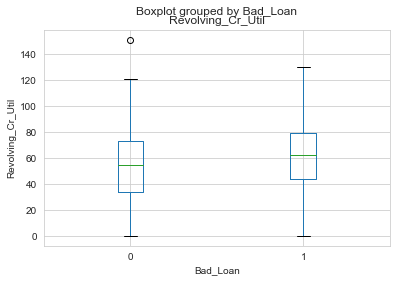

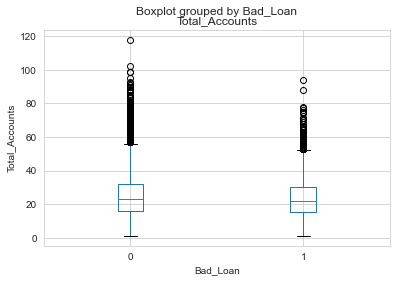

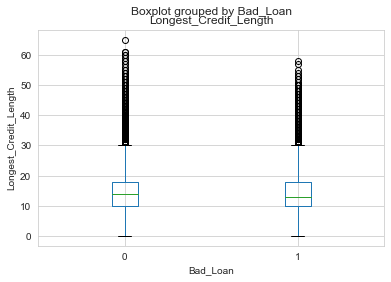

In [37]:
for feature in continuous_feature:
    data=df.copy()
    data.boxplot(column=feature, by='Bad_Loan')
    plt.xlabel('Bad_Loan')
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

* There are many outliers so if we want to represent these boxplots (continuos feature) with one single value its better to use median than mean since median is not sensitive to outliers.

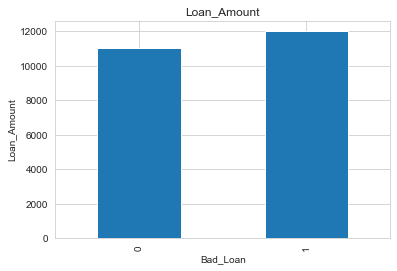

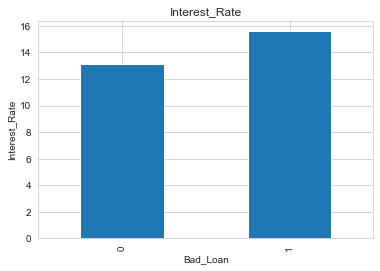

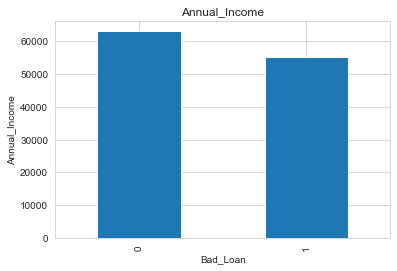

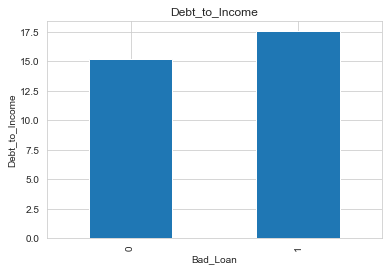

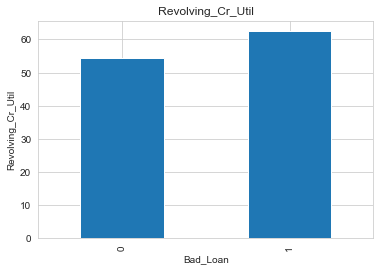

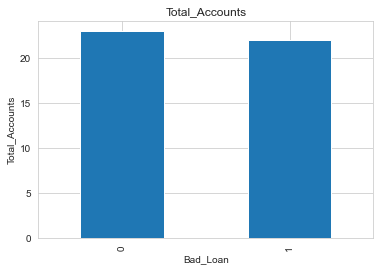

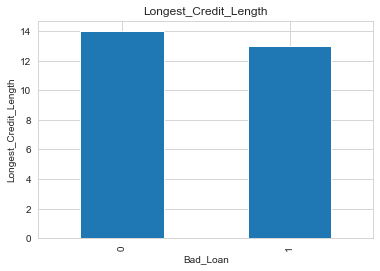

In [38]:
for feature in continuous_feature:
    data=df.copy()
    data.groupby('Bad_Loan')[feature].median().plot.bar()
    plt.xlabel('Bad_Loan')
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

### Step 6 : Categorical Features

In [39]:
# show catgorical features
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O' and feature not in ['Name']]
print(len(categorical_features))
print(categorical_features)

5
['Term', 'Home_Ownership', 'Verification_Status', 'Loan_Purpose', 'State']


In [40]:
# show for categorical feature its cardinality (amount of unique categories)
for feature in categorical_features:
    print(f'Feature {feature} - Number of Categories {len(df[feature].unique())}')

Feature Term - Number of Categories 3
Feature Home_Ownership - Number of Categories 7
Feature Verification_Status - Number of Categories 4
Feature Loan_Purpose - Number of Categories 15
Feature State - Number of Categories 51


Show the distribution of categorical features using CountPlot. We can not plot all the categories of features with huge cardinality. So I will plot only the frequencies/counts of top k most frequent categories.

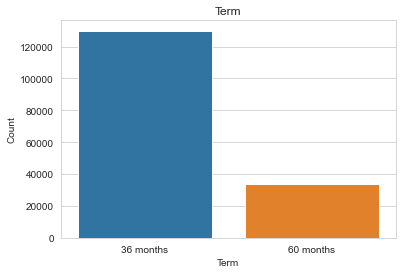

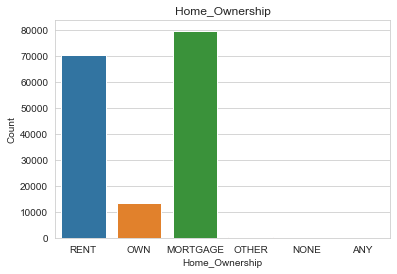

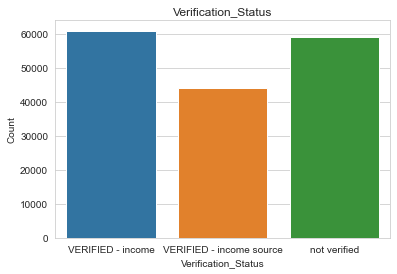

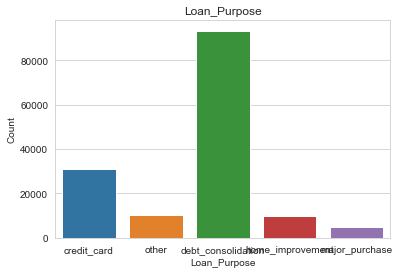

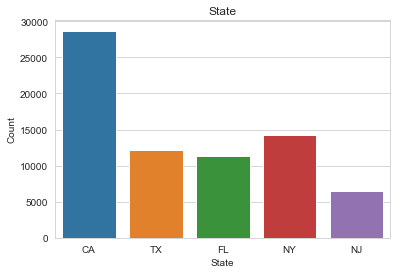

In [44]:
for feature in categorical_features:
    data=df.copy()  
    
    cardinality = len(df[feature].unique())
    if cardinality > 10:
        top_categories = df[feature].value_counts().sort_values(ascending=False).head(5).index
        top = df[feature][df[feature].isin(top_categories)]      
        sns.countplot(x=top, data=data)
        plt.xlabel(feature)
        plt.ylabel('Count')
        plt.title(feature)
        plt.show()
        
    else:    
        sns.countplot(x=feature, data=data)
        plt.xlabel(feature)
        plt.ylabel('Count')
        plt.title(feature)
        plt.show()

In [43]:
df['Loan_Purpose'].value_counts()

debt_consolidation    93261
credit_card           30792
other                 10492
home_improvement       9872
major_purchase         4686
small_business         3841
car                    2842
medical                2029
wedding                1751
moving                 1464
house                  1245
vacation               1096
educational             418
renewable_energy        198
Name: Loan_Purpose, dtype: int64

Find out the relationship between categorical variable and dependent feature Survived

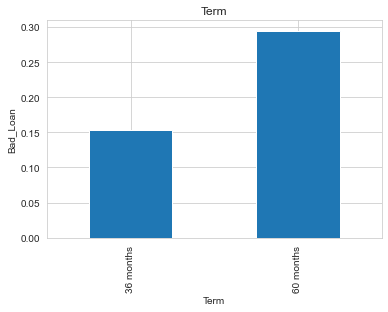

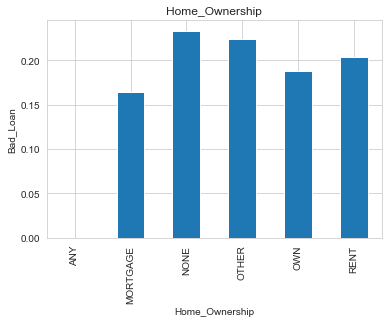

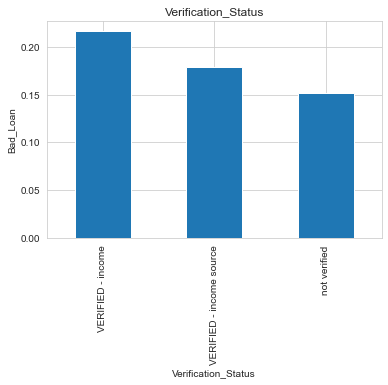

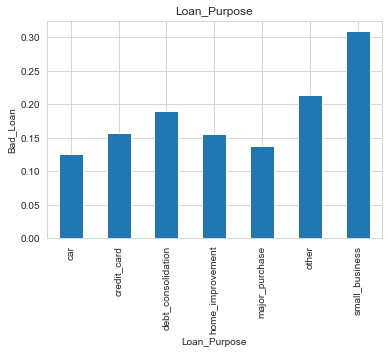

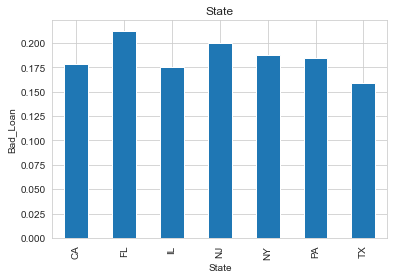

In [46]:
for feature in categorical_features:
    data=df.copy()
    
    cardinality = len(df[feature].unique())
    if cardinality < 10:
        data.groupby(feature)['Bad_Loan'].mean().plot.bar()
        plt.xlabel(feature)
        plt.ylabel('Bad_Loan')
        plt.title(feature)
        plt.show()
        
    else:
        top_categories = df[feature].value_counts().sort_values(ascending=False).head(7).index
        top = df[feature][df[feature].isin(top_categories)]
        data.groupby(top)['Bad_Loan'].mean().plot.bar()
        plt.xlabel(feature)
        plt.ylabel('Bad_Loan')
        plt.title(feature)
        plt.show()

### Step 6 : Outliers

* If feature is normally distributed we use every value that is higher than mean + 3std or lower than mean - 3std is an outlier. If feature does not follow Normal Distribution every value that is higher than 75% percentile + 1.5IQR or lower than 25% - 1.5IQR where IQR = 75% percentile - 25% percentile, is considered as an outlier (using boxplots).
* From the histograms of continuos features we saw that they dont follow the Normal Distribution so I am going to use Boxplot to detect outliers.

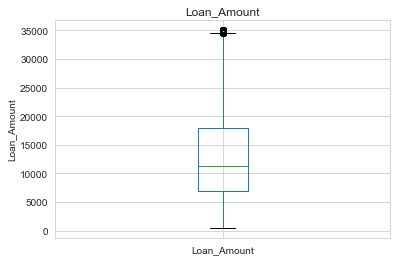

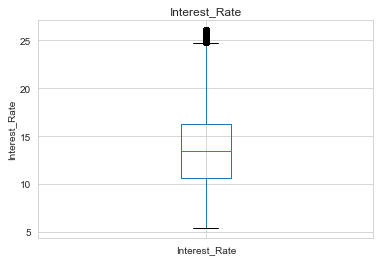

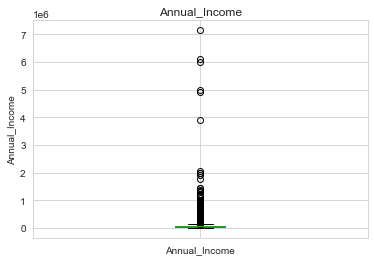

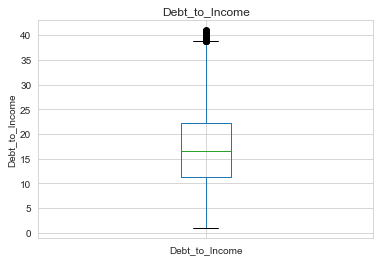

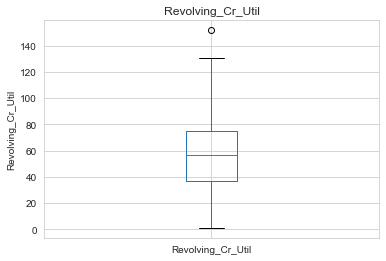

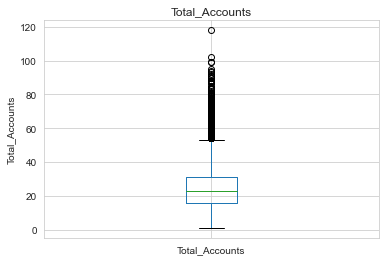

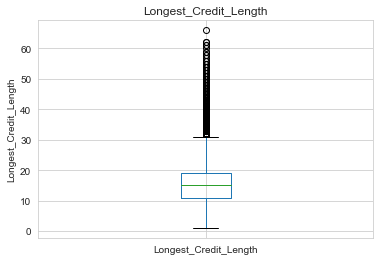

In [47]:
for feature in continuous_feature:
    data=df.copy()
    if 0 in data[feature].unique():
        data[feature] = data[feature] + 1
    
    #data[feature]=np.log(data[feature])
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

* We can see that there are many outliers in our data.

### Step 7 : Other Plots